DEEP LEARNING PROJECT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [2]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
#importing the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
#printing the image
print(X_train[25])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  83  91 143 255 190  91
   50   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   9  49 180 246 253 253 253 253 253
  220 154  17   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  46 107 178 253 253 253 253 253 253 253 253
  253 253 253 126  45   0   0   0   0   0]
 [  0   0   0   0   0   0   0 107 253 253 253 253 223 220 220 220 220 245
  253 253 253 253 106   0   0   0   0   0]
 [  0   0   0   0   0   0   0 107 173 253 229 129  12   0   0   

In [7]:
print(X_train[10].shape)

(28, 28)


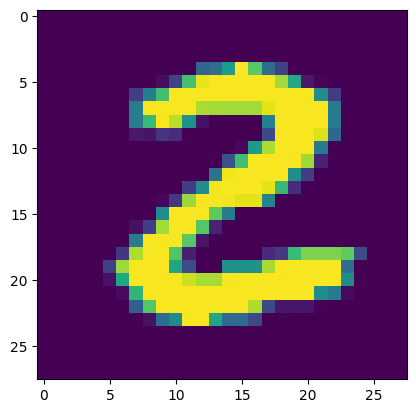

2


In [8]:
plt.imshow(X_train[25])
plt.show()
print(Y_train[25])

In [9]:
#unique values in the Y_train dataset
print(np.unique(Y_train))
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
#scaling the values as we get the values between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [13]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [21]:
#Building the newural network (RNN)
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [22]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2755 - accuracy: 0.9194
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1226 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0892 - accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0695 - accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0568 - accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0473 - accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9863
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0341 - accuracy: 0.9884
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0302 - accuracy: 0.9901
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.026

In [24]:
#accuracy on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0984 - accuracy: 0.9747
0.9746999740600586


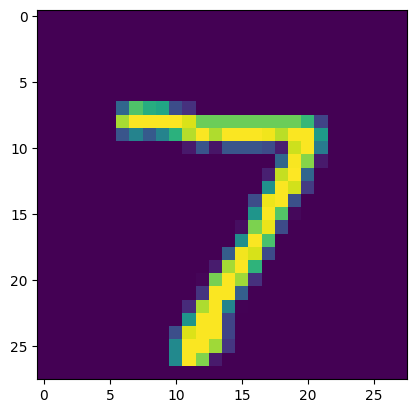

In [26]:
#checking the prediction
plt.imshow(X_test[0])
plt.show()

In [27]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [28]:
print(y_pred[0])

[3.3587887e-05 3.9758219e-05 6.5596360e-01 9.9129623e-01 5.5351457e-09
 4.8236813e-02 2.7444569e-10 9.9999988e-01 2.1771684e-02 4.4503254e-01]


In [29]:
#converting the prediction probablity to class label
label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [30]:
#converting the prediction probablity to class label for test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels
y_pred_labels --> Predicted values

In [32]:
mse = np.mean((Y_test - y_pred_labels) ** 2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.4474


In [33]:
conf_mat = confusion_matrix(Y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 958    1    0    2    1    7    6    1    3    1]
 [   0 1129    2    0    0    1    2    0    1    0]
 [   6    1  990   12    3    4    2    8    4    2]
 [   0    0    3  983    0    7    0    3    5    9]
 [   1    1    4    1  961    0    5    1    0    8]
 [   2    1    0    9    1  867    3    0    8    1]
 [   3    2    0    1    2    6  940    1    2    1]
 [   0    6    7    2    2    0    0  998    4    9]
 [   1    1    1   10    1   12    0    2  944    2]
 [   1    3    0    4   13    5    1    4    3  975]], shape=(10, 10), dtype=int32)


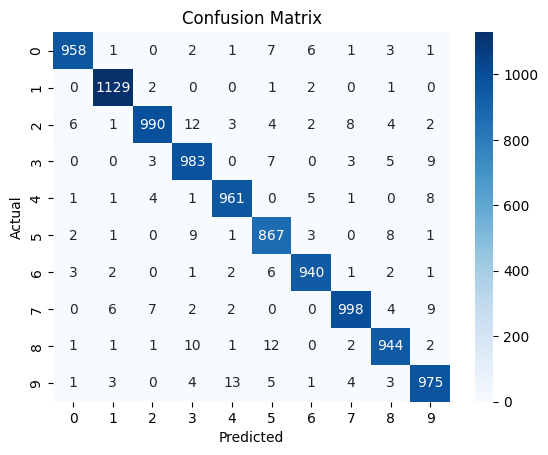

In [35]:
#Visual representation of confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [57]:
#Building a predictive system
input_image_path = input('Path of the image to be predicted')
input_image = cv2.imread(input_image_path)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
#To tell the ml model to predict for only one image
image_reshaped = np.reshape(input_image_resize, (1,28,28))
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

Path of the image to be predicted/content/MNIST_digit.png
1/1 [==============================] - 0s 19ms/step
3
